In [65]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [113]:
ds = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
ds.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [114]:
ds.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [115]:
ds.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [116]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [117]:
ds.shape

(2035, 8)

In [118]:
dsc = ds['Close']
dsc.shape

(2035,)

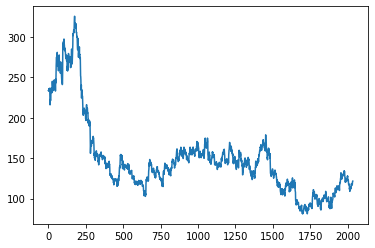

In [119]:
plt.plot(dsc)

In [120]:
scaler = MinMaxScaler(feature_range = (0,1))
dsc = scaler.fit_transform(np.array(dsc).reshape(-1,1))
print(dsc)

[[0.62418301]
 [0.62214052]
 [0.62622549]
 ...
 [0.1621732 ]
 [0.16319444]
 [0.16584967]]


In [121]:
dsc.shape

(2035, 1)

In [122]:
training_size = int(len(dsc) * 0.75)
test_size = len(dsc) - training_size
train_data, test_data = dsc[0:training_size,:], dsc[training_size:len(dsc),:1]
training_size,test_size

(1526, 509)

In [123]:
train_data

array([[0.62418301],
       [0.62214052],
       [0.62622549],
       ...,
       [0.18831699],
       [0.18811275],
       [0.17034314]])

In [124]:
def create_dataset(dataset, time_step = 1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i+time_step, 0])
    return np.array(dataX), np.array(dataY)

In [125]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [126]:
print(x_train.shape), print(y_train.shape)

(1425, 100)
(1425,)


(None, None)

In [127]:
print(x_test.shape), print(y_test.shape)

(408, 100)
(408,)


(None, None)

In [128]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [129]:
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50, return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_9 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_10 (LSTM)               (None, 100, 50)           20200     
_________________________________________________________________
lstm_11 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 36s 458ms/step - loss: 0.0231 - val_loss: 0.0070
Epoch 2/100
23/23 [==============================] - 13s 578ms/step - loss: 0.0028 - val_loss: 0.0018
Epoch 3/100
23/23 [==============================] - 10s 427ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 4/100
23/23 [==============================] - 9s 403ms/step - loss: 0.0013 - val_loss: 0.0015
Epoch 5/100
23/23 [==============================] - 13s 570ms/step - loss: 0.0013 - val_loss: 0.0017
Epoch 6/100
23/23 [==============================] - 12s 522ms/step - loss: 0.0013 - val_loss: 0.0010
Epoch 7/100
23/23 [==============================] - 12s 505ms/step - loss: 0.0011 - val_loss: 0.0013
Epoch 8/100
23/23 [==============================] - 20s 870ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 9/100
23/23 [==============================] - 18s 796ms/step - loss: 9.9221e-04 - val_loss: 9.5687e-04
Epoch 10/100
23/23 [==============================] - 10s 445ms/step - loss

In [130]:
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [131]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [132]:
math.sqrt(mean_squared_error(y_train, train_predict))

83.3420332076999

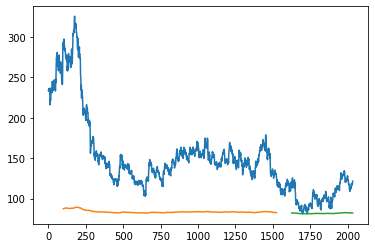

In [133]:
#Shift train prediction for plotting
look_back = 100
trainPredictPlot = np.empty_like(dsc)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#Shift test prediction for plotting
testPredictPlot = np.empty_like(dsc)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2)+1:len(dsc) - 1, :] = test_predict

#Plot baseline and predictions
plt.plot(scaler.inverse_transform(dsc))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [134]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [135]:
x_input = test_data[207:].reshape(1,-1)
x_input.shape

(1, 302)

In [136]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

In [137]:
temp_input

[0.01981209150326796,
 0.019403594771241817,
 0.022467320261437884,
 0.031249999999999944,
 0.02348856209150324,
 0.024918300653594738,
 0.02144607843137253,
 0.04840686274509798,
 0.04575163398692811,
 0.03962418300653592,
 0.039215686274509776,
 0.047589869281045694,
 0.04513888888888884,
 0.041666666666666685,
 0.04125816993464049,
 0.050449346405228745,
 0.055555555555555525,
 0.05494281045751631,
 0.054125816993464027,
 0.04350490196078427,
 0.04799836601307189,
 0.0514705882352941,
 0.05065359477124176,
 0.03431372549019601,
 0.04575163398692811,
 0.0418709150326797,
 0.04554738562091498,
 0.03941993464052285,
 0.02716503267973852,
 0.031249999999999944,
 0.05882352941176466,
 0.07148692810457513,
 0.08721405228758167,
 0.08986928104575165,
 0.10498366013071897,
 0.08905228758169931,
 0.10355392156862742,
 0.10375816993464049,
 0.12275326797385616,
 0.1090686274509804,
 0.09660947712418294,
 0.10641339869281041,
 0.10457516339869277,
 0.11049836601307189,
 0.11274509803921567,
 0

In [138]:
lst_output=[]
n_steps=301
nextNumberOfDays = 30
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

0 day input [0.01940359 0.02246732 0.03125    0.02348856 0.0249183  0.02144608
 0.04840686 0.04575163 0.03962418 0.03921569 0.04758987 0.04513889
 0.04166667 0.04125817 0.05044935 0.05555556 0.05494281 0.05412582
 0.0435049  0.04799837 0.05147059 0.05065359 0.03431373 0.04575163
 0.04187092 0.04554739 0.03941993 0.02716503 0.03125    0.05882353
 0.07148693 0.08721405 0.08986928 0.10498366 0.08905229 0.10355392
 0.10375817 0.12275327 0.10906863 0.09660948 0.1064134  0.10457516
 0.11049837 0.1127451  0.09803922 0.09987745 0.08925654 0.0747549
 0.08169935 0.08925654 0.09068627 0.08129085 0.08823529 0.08455882
 0.07945261 0.08374183 0.07781863 0.09824346 0.09089052 0.09007353
 0.09558824 0.06862745 0.06372549 0.0494281  0.04799837 0.04534314
 0.0443219  0.03941993 0.0379902  0.04656863 0.05085784 0.07209967
 0.06535948 0.07230392 0.07802288 0.07741013 0.06086601 0.06413399
 0.07046569 0.05412582 0.0498366  0.05167484 0.05330882 0.0435049
 0.02634804 0.02410131 0.02961601 0.01960784 0.02961

In [139]:
new_day = np.arange(1,101)
pred_new = np.arange(101,131)


In [140]:
len(dsc)

2035

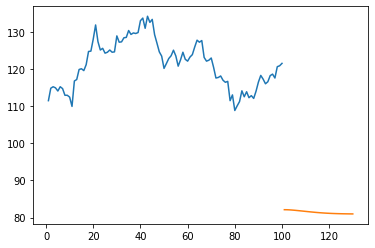

In [141]:
plt.plot(new_day, scaler.inverse_transform(dsc[1935:]))
plt.plot(pred_new, scaler.inverse_transform(lst_output))

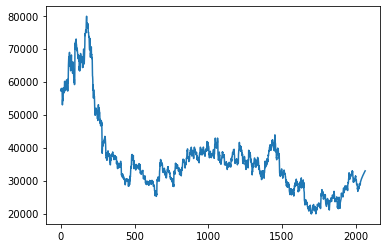

In [142]:
dsg=scaler.inverse_transform(dsg).tolist()
plt.plot(dsg)